# **Fashion Recommendation using EfficientNet B3 - Predicting Test Image**

## **1. Import Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
from sklearn.neighbors import NearestNeighbors
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

## **2. Pretrained EfficientNet Model**

In [ ]:
base_model = EfficientNetB3(weights='imagenet', include_top=False)
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

(None, None, None, 1536)
(None, 1536)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, None, None, 3)        0         ['input_4[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, None, None, 3)        7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, None, None, 3)    

                                                                                                  
 block2a_expand_conv (Conv2  (None, None, None, 144)      3456      ['block1b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2a_expand_bn (BatchNo  (None, None, None, 144)      576       ['block2a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2a_expand_activation   (None, None, None, 144)      0         ['block2a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2a_d

 block2c_expand_conv (Conv2  (None, None, None, 192)      6144      ['block2b_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block2c_expand_bn (BatchNo  (None, None, None, 192)      768       ['block2c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block2c_expand_activation   (None, None, None, 192)      0         ['block2c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block2c_dwconv (DepthwiseC  (None, None, None, 192)      1728      ['block2c_expand_activation[0]
 onv2D)   

 D)                                                                                               
                                                                                                  
 block3b_expand_bn (BatchNo  (None, None, None, 288)      1152      ['block3b_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block3b_expand_activation   (None, None, None, 288)      0         ['block3b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block3b_dwconv (DepthwiseC  (None, None, None, 288)      7200      ['block3b_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4a_expand_conv (Conv2  (None, None, None, 288)      13824     ['block3c_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4a_expand_bn (BatchNo  (None, None, None, 288)      1152      ['block4a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4a_expand_activation   (None, None, None, 288)      0         ['block4a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4a_dwconv_pad (ZeroPa  (None, None, None, 288)      0         ['block4a_expand_activation[0]
 dding2D) 

 D)                                                                                               
                                                                                                  
 block4c_expand_bn (BatchNo  (None, None, None, 576)      2304      ['block4c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4c_expand_activation   (None, None, None, 576)      0         ['block4c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4c_dwconv (DepthwiseC  (None, None, None, 576)      5184      ['block4c_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 block4e_expand_conv (Conv2  (None, None, None, 576)      55296     ['block4d_add[0][0]']         
 D)                                                                                               
                                                                                                  
 block4e_expand_bn (BatchNo  (None, None, None, 576)      2304      ['block4e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block4e_expand_activation   (None, None, None, 576)      0         ['block4e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block4e_dwconv (DepthwiseC  (None, None, None, 576)      5184      ['block4e_expand_activation[0]
 onv2D)   

 rmalization)                                                                                     
                                                                                                  
 block5b_expand_activation   (None, None, None, 816)      0         ['block5b_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5b_dwconv (DepthwiseC  (None, None, None, 816)      20400     ['block5b_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5b_bn (BatchNormaliza  (None, None, None, 816)      3264      ['block5b_dwconv[0][0]']      
 tion)                                                                                            
          

 block5d_expand_bn (BatchNo  (None, None, None, 816)      3264      ['block5d_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block5d_expand_activation   (None, None, None, 816)      0         ['block5d_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block5d_dwconv (DepthwiseC  (None, None, None, 816)      20400     ['block5d_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block5d_bn (BatchNormaliza  (None, None, None, 816)      3264      ['block5d_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6a_expand_bn (BatchNo  (None, None, None, 816)      3264      ['block6a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6a_expand_activation   (None, None, None, 816)      0         ['block6a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6a_dwconv_pad (ZeroPa  (None, None, None, 816)      0         ['block6a_expand_activation[0]
 dding2D)                                                           [0]']                         
                                                                                                  
 block6a_d

 block6c_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block6c_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6c_expand_activation   (None, None, None, 1392)     0         ['block6c_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6c_dwconv (DepthwiseC  (None, None, None, 1392)     34800     ['block6c_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6c_bn (BatchNormaliza  (None, None, None, 1392)     5568      ['block6c_dwconv[0][0]']      
 tion)    

                                                                                                  
 block6e_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block6e_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block6e_expand_activation   (None, None, None, 1392)     0         ['block6e_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block6e_dwconv (DepthwiseC  (None, None, None, 1392)     34800     ['block6e_expand_activation[0]
 onv2D)                                                             [0]']                         
                                                                                                  
 block6e_b

 D)                                                                                               
                                                                                                  
 block7a_expand_bn (BatchNo  (None, None, None, 1392)     5568      ['block7a_expand_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 block7a_expand_activation   (None, None, None, 1392)     0         ['block7a_expand_bn[0][0]']   
 (Activation)                                                                                     
                                                                                                  
 block7a_dwconv (DepthwiseC  (None, None, None, 1392)     12528     ['block7a_expand_activation[0]
 onv2D)                                                             [0]']                         
          

 top_activation (Activation  (None, None, None, 1536)     0         ['top_bn[0][0]']              
 )                                                                                                
                                                                                                  
 global_average_pooling2d_3  (None, 1536)                 0         ['top_activation[0][0]']      
  (GlobalAveragePooling2D)                                                                        
                                                                                                  
Total params: 10783535 (41.14 MB)
Trainable params: 10696232 (40.80 MB)
Non-trainable params: 87303 (341.03 KB)
__________________________________________________________________________________________________


## **3. Preprocessing and Predicting Features for Test Image**

In [ ]:
test_image = 'test_white_tshirt.jpg'

In [ ]:
def process_single_image(img_path, model):
    img = image.load_img(img_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(expanded_img_array)
    features = model.predict(img_array).flatten()
    result = features / norm(features)
    return result

In [ ]:
result = process_single_image(test_image, model)

1/1 [==============================] - 2s 2s/step


In [ ]:
print(result)

[ 0.0312185  -0.01128963  0.00211469 ...  0.02139335  0.0347686
 -0.02078091]


## **4. Loading Features of Full Dataset**

In [ ]:
feature_list = np.array(pickle.load(open('embeddings_efficientB3.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

In [ ]:
feature_list

array([[ 0.0012816 ,  0.02368512, -0.01314284, ...,  0.08545855,
         0.01101188,  0.00356151],
       [ 0.06586723,  0.091178  ,  0.01285404, ..., -0.01462708,
         0.02798665, -0.00896619],
       [-0.00998433, -0.00303569, -0.01131202, ...,  0.02138892,
         0.02522769,  0.02177767],
       ...,
       [ 0.10233352, -0.01220581, -0.01506288, ...,  0.01541944,
        -0.00453224, -0.01684769],
       [-0.00365721, -0.01309452, -0.01548119, ...,  0.00079221,
         0.03188692, -0.00355311],
       [-0.01588356, -0.01429848, -0.01171605, ..., -0.01879745,
         0.02788342, -0.00849341]], dtype=float32)

## **5. Using KNN to predict top 5 recommendations**

In [ ]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)
distances, indices = neighbors.kneighbors([result])


In [ ]:
print(indices)

[[17031 33909 40212 43914 38538  7245]]


## **6. Visualising Top 5 Recommendations**

images/44221.jpg


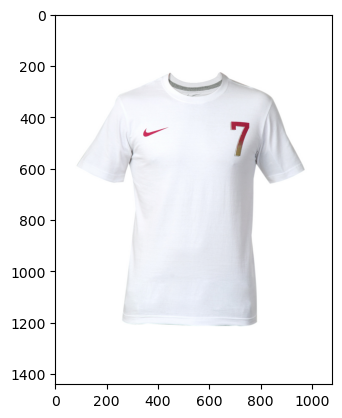

images/14014.jpg


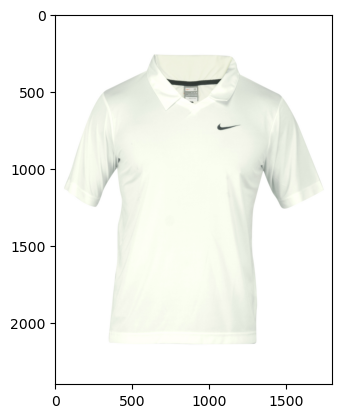

images/44225.jpg


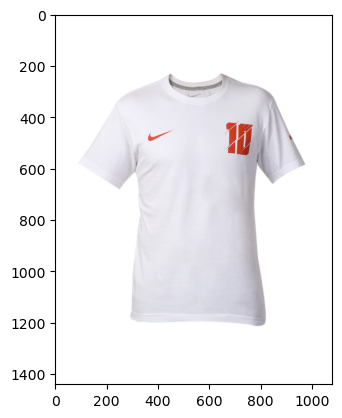

images/27974.jpg


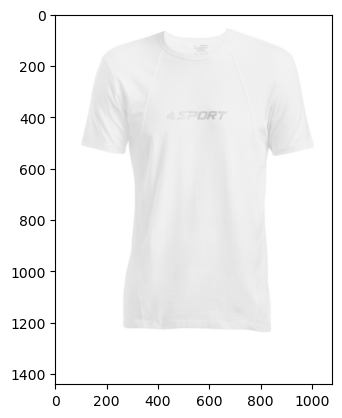

images/14008.jpg


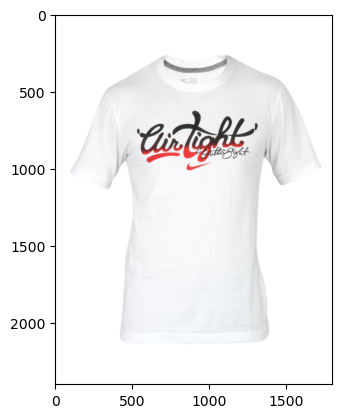

In [ ]:
from matplotlib import pyplot as plt

for index in indices[0][1:6]:
    image_path = filenames[index]
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
